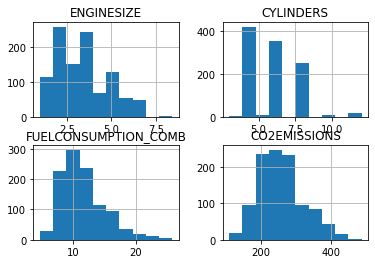

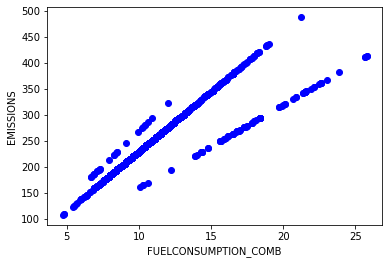

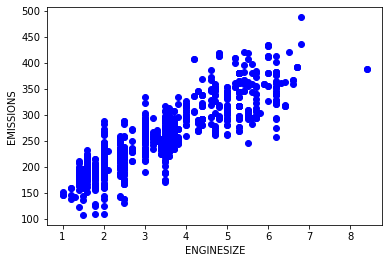

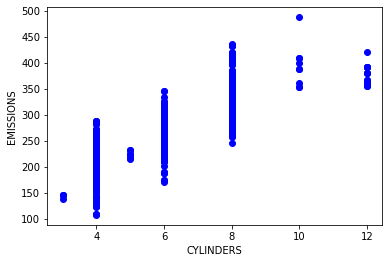

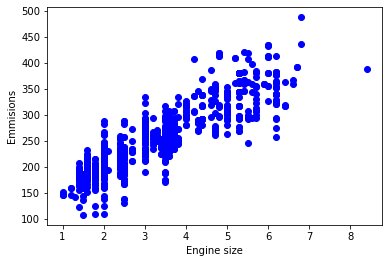

Coefficients: [[39.72291326]]
Intercept: [123.33140713]
mean absolute error: 23.09
residual sum of squares (MSE): 886.90
R2-score 0.73


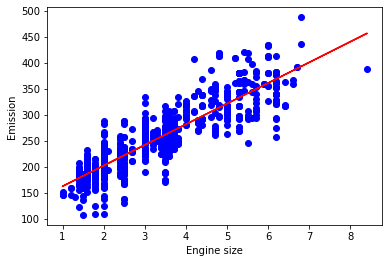

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score


df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

#data exploration
#summarize the data
df.describe

#select the feature to explore more
cdf = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
cdf.head(9)

# plot each of these features:
viz = cdf[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]
viz.hist()
plt.show()

#  plot each of these features vs the Emission, to see how linear is their relation:
# FUELCONSUMPTION_COMB
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS , color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('EMISSIONS')
plt.show()

# ENGINESIZE
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS , color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('EMISSIONS')
plt.show()

# CYLINDERS
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS , color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('EMISSIONS')
plt.show()

# create train and test dataset
#  split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# train the dataset distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emmisions')
plt.show()

#modeling 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# the coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

#plot outputs
# plot the fit line over the data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

# evaluate
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)
print("mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) **2) )
print("R2-score %.2f" % r2_score(test_y_hat, test_y))